In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
from tools import *

In [3]:
root_calib_path = os.getcwd()+"/datasets/data_week_%d/calibration/%d/"
root_skydip_path = os.getcwd()+"/datasets/data_week_%d/sky_dip/%d/"

In [4]:
def calib_files(week, trial):
    path = root_calib_path % (week, trial)
    files = []
    for file in os.listdir(path):
        files.append(path+file)
    return files

def skydip_files(week, trial):
    path = root_skydip_path % (week, trial)
    files = []
    for file in os.listdir(path):
        files.append(path+file)
    return files

In [9]:
datasets = {
    "calibration" : {
        "files"  : [
            calib_files(week=2, trial=1),
            calib_files(week=2, trial=2)
        ], 
        "data"   : [],
        "map"    : []
    },
    "skydip"     : {
        "files"  : [
            skydip_files(week=2, trial=1), 
            skydip_files(week=2, trial=2),
            # skydip_files(week=1, trial=1),
            # skydip_files(week=1, trial=2),
            # skydip_files(week=1, trial=3)

        ], 
        "data"   : [],
        "map"    : []
    }
}

In [10]:
import time
for file_list in datasets["calibration"]["files"]:
    ambient = None
    liquid_nitro = None
    for file in file_list:
        if "ambient" in file:
            ambient = Data(file)
        elif "liquid_nitro" in file:
            liquid_nitro = Data(file)
    datasets["calibration"]["data"].append([ambient, liquid_nitro])

for file_list in datasets["skydip"]["files"]:
    datum = []
    for file in file_list:
        datum.append(Data(file))
    datasets["skydip"]["data"].append(datum) 

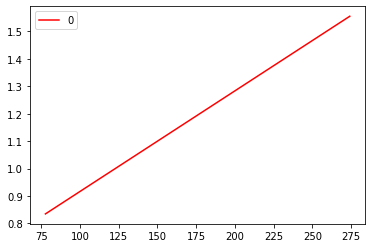

No handles with labels found to put in legend.


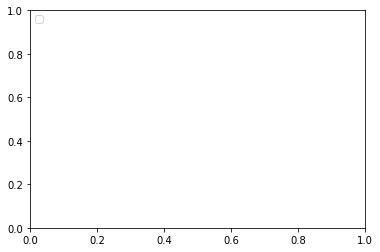

In [11]:
m, b, r_sq = plot_single_calibration(datasets["calibration"]["data"][0])

In [13]:
m, b, r_sq

(0.0036648079773282825, 0.5493320667629895, 1.0)

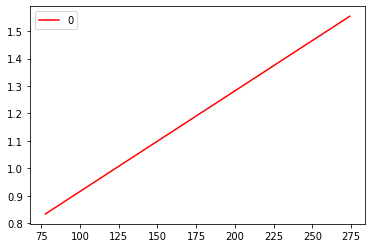

No handles with labels found to put in legend.


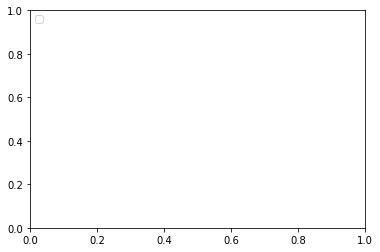

In [14]:
m, b, r_sq = plot_single_calibration(datasets["calibration"]["data"][1])

In [15]:
m, b, r_sq

(0.0036648079773282825, 0.5493320667629895, 1.0)

No handles with labels found to put in legend.


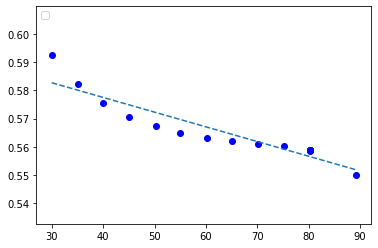

In [16]:
m, b, r_sq = plot_angle(datasets["skydip"]["data"][0])

In [17]:
m, b, r_sq

(-0.0005208873433674823, 0.598318488187086, 0.8673064636595318)

No handles with labels found to put in legend.


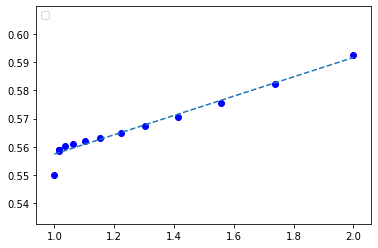

In [18]:
m, b, r_sq = plot_angle(datasets["skydip"]["data"][0], transform=True)

In [19]:
m, b, r_sq

(0.03420149666997488, 0.5232102232915783, 0.959463908269536)

In [22]:
data = Data(root_calib_path % (1, 1) + "2020-02-14_14:21:34_Readout.txt")

In [23]:
data.df.describe()

,time,power,temperature
count,9.900000e+01,99.000000,99.000000
mean,1.581708e+09,-0.848274,77.724758
std,2.906280e+00,0.002423,0.005175
min,1.581708e+09,-0.852500,77.717000
25%,1.581708e+09,-0.849300,77.720000
50%,1.581708e+09,-0.848900,77.723000
75%,1.581708e+09,-0.848200,77.729000
max,1.581708e+09,-0.839700,77.736000
